In [196]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score,classification_report
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.model_selection import GridSearchCV


In [197]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "BreastCancer.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "anairamcosta/breastcancer-csv",
  file_path,
  # Provide any additional arguments like 
  # sql_query or pandas_kwargs. See the 
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

C:\Users\msnit\AppData\Local\Temp\ipykernel_5368\3200788613.py:8: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  df = kagglehub.load_dataset(


In [198]:
df.sample(10)

,Id,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
297,61634,5,4,3,1,2,NaN,2,3,1,0
334,785615,8,6,7,3,3,10.0,3,4,2,1
669,1350423,5,10,10,8,5,5.0,7,10,1,1
391,1151734,10,8,7,4,3,10.0,7,9,1,1
232,1231706,8,4,6,3,3,1.0,4,3,1,0
314,704097,1,1,1,1,1,1.0,2,1,1,0
398,1196475,3,2,1,1,2,1.0,2,2,1,0
421,1257200,10,10,10,7,10,10.0,8,2,1,1
273,428903,7,2,4,1,3,4.0,3,3,1,1
665,1347749,1,1,1,1,2,1.0,1,1,1,0


In [199]:
import seaborn as sns


<Axes: xlabel='Cell.size', ylabel='Cell.shape'>

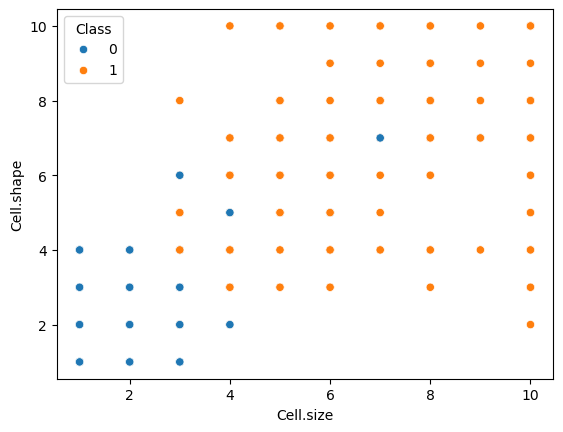

In [200]:
sns.scatterplot(data=df,x='Cell.size',y='Cell.shape',hue='Class')

In [201]:
X=df.drop(columns=['Id','Class'],axis=1)
y=df['Class']
df.shape

(699, 11)

In [202]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [203]:
X_train.head()

,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses
137,3,1,1,1,2,1.0,1,1,1
485,1,1,1,3,1,3.0,1,1,1
483,8,7,8,5,5,10.0,9,10,1
33,2,1,1,2,2,1.0,3,1,1
662,1,1,3,1,2,1.0,2,1,1


In [204]:
X_test.head()

,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses
158,1,1,2,1,3,NaN,1,1,1
499,4,1,1,1,2,1.0,2,1,1
396,3,1,1,1,2,1.0,3,1,1
155,5,5,5,6,3,10.0,3,1,1
321,3,1,1,1,2,NaN,3,1,1


In [205]:
df.isnull().sum()

Id                  0
Cl.thickness        0
Cell.size           0
Cell.shape          0
Marg.adhesion       0
Epith.c.size        0
Bare.nuclei        16
Bl.cromatin         0
Normal.nucleoli     0
Mitoses             0
Class               0
dtype: int64

In [206]:

tf1=ColumnTransformer(transformers=[('tf1',SimpleImputer(strategy='mean'),['Bare.nuclei'])],remainder='passthrough')


In [207]:
tf1

ColumnTransformer(remainder='passthrough',
                  transformers=[('tf1', SimpleImputer(), ['Bare.nuclei'])])

In [208]:
trf2=DecisionTreeClassifier()

In [209]:
trf2

DecisionTreeClassifier()

In [210]:
clf_pipeline = Pipeline([
    ('trf1', tf1),
    ('classifier', DecisionTreeClassifier())
])

In [211]:
clf_pipeline

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('tf1', SimpleImputer(),
                                                  ['Bare.nuclei'])])),
                ('classifier', DecisionTreeClassifier())])

In [212]:
clf_pipeline.fit(X_train,y_train)

C:\Users\msnit\anaconda3l\envs\myenv\lib\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('tf1', SimpleImputer(),
                                                  ['Bare.nuclei'])])),
                ('classifier', DecisionTreeClassifier())])

In [191]:
clf_pipeline.named_steps

{'trf1': ColumnTransformer(remainder='passthrough',
                   transformers=[('tf1', SimpleImputer(), ['Bare.nuclei'])]),
 'classifier': DecisionTreeClassifier()}

In [213]:
y_prediction=clf_pipeline.predict(X_test)


In [214]:
y_prediction


array([0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1], dtype=int64)

In [215]:
accuracy=accuracy_score(y_test,y_prediction)
accuracy

0.948051948051948

In [163]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               699 non-null    int64  
 1   Cl.thickness     699 non-null    int64  
 2   Cell.size        699 non-null    int64  
 3   Cell.shape       699 non-null    int64  
 4   Marg.adhesion    699 non-null    int64  
 5   Epith.c.size     699 non-null    int64  
 6   Bare.nuclei      683 non-null    float64
 7   Bl.cromatin      699 non-null    int64  
 8   Normal.nucleoli  699 non-null    int64  
 9   Mitoses          699 non-null    int64  
 10  Class            699 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 60.2 KB


In [174]:

expected_columns = X.columns.tolist()
expected_columns

['Cl.thickness',
 'Cell.size',
 'Cell.shape',
 'Marg.adhesion',
 'Epith.c.size',
 'Bare.nuclei',
 'Bl.cromatin',
 'Normal.nucleoli',
 'Mitoses']

In [181]:
test_input2= pd.DataFrame([dict(zip(expected_columns, [5, 1, 1, 0, 3, 4, 5, 7, 1]))])


In [182]:
predicttt=clf_pipeline.predict(test_input2)

In [188]:
test_input3= pd.DataFrame([dict(zip(expected_columns, [1, 1, 1, 0, 0, 4, 5, 0, 1]))])

In [217]:
param_grid = {
    'classifier__criterion': ['gini', 'entropy', 'log_loss'],
    'classifier__max_depth': [None, 3, 5, 10, 20],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__max_features': [None, 'sqrt', 'log2']
}


In [231]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(
    clf_pipeline,             
    param_grid=param_grid,    
    cv=10,                   
    scoring='accuracy',      
    n_jobs=-1,              
    verbose=1
)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)
y_pred = best_model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))


Fitting 10 folds for each of 405 candidates, totalling 4050 fits
Best Parameters: {'classifier__criterion': 'gini', 'classifier__max_depth': 5, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 5}
Test Accuracy: 0.961038961038961


In [232]:
predicttt=clf_pipeline.predict(test_input3)
predicttt

array([0], dtype=int64)

In [234]:
accuracy_score(y_test,y_pred)

0.961038961038961